## Áí∞Â¢ÉË®≠ÂÆöÂèäÊï¥Âêà


### Python Â•ó‰ª∂Â∞éÂÖ•

In [78]:
import os
import numpy as np
import pandas as pd
import chardet
import datetime
import pandas as pd
import jieba
from functools import partial
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_selection import SelectKBest, f_regression, chi2
from ckip_transformers.nlp import CkipWordSegmenter, CkipPosTagger, CkipNerChunker
import jieba
from TCSP import read_stopwords_list
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
import matplotlib.pyplot as plt

### Ë≥áÊñôÈõÜ‰∏ãËºâÂèäËÆÄÂèñ

In [5]:
# root = r'C:\Users\tony\Desktop\bda_project\BDA'
root ='../bda2024_mid_dataset'
data = {}
for filename in os.listdir(root):
	if '.ipynb_checkpoints' in filename:
		continue  # ÂøΩÁï• .ipynb_checkpoints ÁõÆÂΩï
	words = filename.split('_')
	readable_filename = ''.join(words[-2:])
	filepath = f'{root}/{filename}'
	print(f'Ê≠£Âú®ËºâÂÖ• {readable_filename} ...')
	df = pd.read_csv(filepath, encoding='utf-8')
	print(df)
	data[readable_filename[:-4]] = df
	print(f'ÊàêÂäüËºâÂÖ• {readable_filename}„ÄÇ')

Ê≠£Âú®ËºâÂÖ• Ë®éË´ñÊï∏Êìödcard.csv ...
                         id  forum      s_name s_area_name  \
0       1646109801927_F0DCU  forum  Ê†°ÂúíËÅäÂ§©-Dcard          ËÇ°Á•®   
1       1646109801940_F0DCU  forum  Ê†°ÂúíËÅäÂ§©-Dcard          ËÇ°Á•®   
2       1646115341451_F0DCU  forum  Ê†°ÂúíËÅäÂ§©-Dcard          ËÇ°Á•®   
3       1646113689192_F0DCU  forum  Ê†°ÂúíËÅäÂ§©-Dcard          ËÇ°Á•®   
4       1646068286032_F0DCU  forum  Ê†°ÂúíËÅäÂ§©-Dcard          ËÇ°Á•®   
...                     ...    ...         ...         ...   
231315  1709239679954_F0DCU  forum  Ê†°ÂúíËÅäÂ§©-Dcard          ËÇ°Á•®   
231316  1709248667603_F0DCU  forum  Ê†°ÂúíËÅäÂ§©-Dcard          ËÇ°Á•®   
231317  1709244637745_F0DCU  forum  Ê†°ÂúíËÅäÂ§©-Dcard          ËÇ°Á•®   
231318  1709278750256_F0DCU  forum  Ê†°ÂúíËÅäÂ§©-Dcard          ËÇ°Á•®   
231319  1709244637803_F0DCU  forum  Ê†°ÂúíËÅäÂ§©-Dcard          ËÇ°Á•®   

                      post_time                 title      author  \
0       2022-03-01 00:00:18

/var/folders/gf/q242kxcx471dfq8lmv99k_y80000gn/T/ipykernel_42737/2246065747.py:11: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath, encoding='utf-8')


         stock_name stock_symbol  foreign_investor_bought  \
0                ‰ø°Â§ß         1109                     2000   
1                ‰ø°Â§ß         1109                        0   
2                ‰ø°Â§ß         1109                    11000   
3                ‰ø°Â§ß         1109                    13000   
4                ‰ø°Â§ß         1109                    68000   
...             ...          ...                      ...   
998026          ÁèæËßÄÁßë         6906                    28000   
998027        ÈáëËê¨Êûó-Ââµ         6645                    14000   
998028  Áæ§ÁõäESGÊäïÁ≠âÂÇµ20+       00937B                  1511400   
998029         ÁéñÈºéÈõªÂäõ         4588                   389000   
998030      ‰∏ñÁïåÂÅ•Ë∫´-KY         2762                    10000   

        foreign_investor_sold  investment_trust_bought  investment_trust_sold  \
0                        3000                        0                      0   
1                       11000                

/var/folders/gf/q242kxcx471dfq8lmv99k_y80000gn/T/ipykernel_42737/2246065747.py:11: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath, encoding='utf-8')


        stock_name stock_symbol   open   high    low  close  volume  \
0               Êó•È¶≥         1526  47.55  48.45  47.55  48.30     138   
1               Êó•È¶≥         1526  48.30  48.30  47.40  47.95     153   
2               Êó•È¶≥         1526  48.45  48.70  47.80  48.10     120   
3               Êó•È¶≥         1526  47.95  47.95  47.55  47.60     165   
4               Êó•È¶≥         1526  47.65  47.65  45.30  45.65     514   
...            ...          ...    ...    ...    ...    ...     ...   
1154220         Áµ±‰∏Ä         1216  76.20  78.60  76.00  77.20   20607   
1154221         Áµ±‰∏Ä         1216  76.80  78.80  76.40  78.80   16466   
1154222         Áµ±‰∏Ä         1216  78.00  78.70  77.10  78.20   16015   
1154223         Áµ±‰∏Ä         1216  78.00  78.00  76.30  77.40    8524   
1154224         Áµ±‰∏Ä         1216  76.10  77.20  75.80  76.20    8347   

                        date  
0        2022-03-01 00:00:00  
1        2022-03-02 00:00:00  
2        2022-

In [6]:
data.keys()

dict_keys(['Ë®éË´ñÊï∏Êìödcard', 'ÂÖßÂÆπÊï∏ÊìöÊñ∞ËÅû3', 'ÂæÆËÇ°ÂäõÁ±åÁ¢ºÊï∏Êìö-2Âπ¥', 'ÂÖßÂÆπÊï∏ÊìöÊñ∞ËÅû2', 'ÂæÆËÇ°ÂäõÁ§æÁæ§PKTD-2Âπ¥', 'ÂÖßÂÆπÊï∏ÊìöÊñ∞ËÅû1', 'Ë®éË´ñÊï∏Êìöptt', 'ÂæÆËÇ°ÂäõË≤°Â†±Êï∏Êìö-2Âπ¥', 'ÂæÆËÇ°ÂäõÂÄãËÇ°‰∫§ÊòìÊï∏Êìö-2Âπ¥', 'Ë®éË´ñÊï∏Êìömobile01-1', 'Ë®éË´ñÊï∏Êìömobile01-2'])

In [7]:
# È°ûËÇ°‰ª£ËôüÁöÜËΩâÁÇ∫ string ÂûãÊÖã
data['ÂæÆËÇ°ÂäõÂÄãËÇ°‰∫§ÊòìÊï∏Êìö-2Âπ¥']['stock_symbol'] = data['ÂæÆËÇ°ÂäõÂÄãËÇ°‰∫§ÊòìÊï∏Êìö-2Âπ¥']['stock_symbol'].astype(str)
data['ÂæÆËÇ°ÂäõÁ§æÁæ§PKTD-2Âπ¥']['stock_symbol'] = data['ÂæÆËÇ°ÂäõÁ§æÁæ§PKTD-2Âπ¥']['stock_symbol'].astype(str)
data['ÂæÆËÇ°ÂäõÁ±åÁ¢ºÊï∏Êìö-2Âπ¥']['stock_symbol'] = data['ÂæÆËÇ°ÂäõÁ±åÁ¢ºÊï∏Êìö-2Âπ¥']['stock_symbol'].astype(str)
data['ÂæÆËÇ°ÂäõË≤°Â†±Êï∏Êìö-2Âπ¥']['stock_symbol'] = data['ÂæÆËÇ°ÂäõË≤°Â†±Êï∏Êìö-2Âπ¥']['stock_symbol'].astype(str)


# ÂëºÂè´Ê¨°Êï∏Êï¥ÁêÜ
data['ÂæÆËÇ°ÂäõÁ§æÁæ§PKTD-2Âπ¥']['actionP'] = data['ÂæÆËÇ°ÂäõÁ§æÁæ§PKTD-2Âπ¥']['actionP'] // 123
data['ÂæÆËÇ°ÂäõÁ§æÁæ§PKTD-2Âπ¥']['actionK'] = data['ÂæÆËÇ°ÂäõÁ§æÁæ§PKTD-2Âπ¥']['actionK'] // 123
data['ÂæÆËÇ°ÂäõÁ§æÁæ§PKTD-2Âπ¥']['actionT'] = data['ÂæÆËÇ°ÂäõÁ§æÁæ§PKTD-2Âπ¥']['actionT'] // 123
data['ÂæÆËÇ°ÂäõÁ§æÁæ§PKTD-2Âπ¥']['actionD'] = data['ÂæÆËÇ°ÂäõÁ§æÁæ§PKTD-2Âπ¥']['actionD'] // 123

### ‰∏≠ÊñáÊñáÊú¨ËôïÁêÜ

In [8]:
!git clone https://github.com/fxsjy/jieba.git
jieba.set_dictionary('jieba/extra_dict/dict.txt.big')

fatal: destination path 'jieba' already exists and is not an empty directory.


#### ‰∏≠ÊñáÊñáÊú¨Êñ∑Ë©û

In [9]:
data['Ë®éË´ñÊï∏Êìödcard'] = data['Ë®éË´ñÊï∏Êìödcard'][['post_time', 'title', 'content']]
data['Ë®éË´ñÊï∏Êìödcard']

post_time                 title  \
0       2022-03-01 00:00:18.000        #ÂàÜ‰∫´ ÊäïË≥áËÇ°Á•®ÂÄã‰∫∫Á∂ìÈ©óÂàÜ‰∫´   
1       2022-03-01 00:00:22.000        #ÂàÜ‰∫´ ÊäïË≥áËÇ°Á•®ÂÄã‰∫∫Á∂ìÈ©óÂàÜ‰∫´   
2       2022-03-01 00:07:48.000  #Ê®ôÁöÑ Ë´ãÂïèÁèæÂú® Âè∞Á©çÈõª ÊòØÊôÇÂÄôË≤∑ÂÖ•ÂóéÔºü   
3       2022-03-01 00:14:04.000         #ÂàÜ‰∫´ ÊòéÂ§©Áá¶Âù§ÊúâÊ©üÊúÉÊº≤ÂÅú   
4       2022-03-01 00:17:39.000        #ÂàÜ‰∫´ Áï∂Ê≤ñ ÂÖ≠ÂÄãÊúàÁöÑÂøÉÊÉÖüòÇ   
...                         ...                   ...   
231315  2024-02-29 23:57:06.000       #ÂàÜ‰∫´ 2/29 ‰πüÊòØÈÄüÊà∞ÈÄüÊ±∫   
231316  2024-02-29 23:58:11.000         #Ë´ãÁõä ÊâæÂè∞Êñ∞Ë≠âÂà∏ÁöÑÁáüÊ•≠Âì°   
231317  2024-02-29 23:58:31.000      #ÂÖ∂‰ªñ 2024Âè∞ËÇ°ÁúãÊº≤orÁúãË∑å   
231318  2024-02-29 23:58:42.000     #ÂàÜ‰∫´ „ÄåÂ§ßÁ∂ú‰∫ÆÁáàÔºå‰∫ûÂäõË¢´Ê¥óÊéâ‰∫Ü„Äç   
231319  2024-02-29 23:59:21.000      #ÂÖ∂‰ªñ 2024Âè∞ËÇ°ÁúãÊº≤orÁúãË∑å   

                                                  content  
0                                ÂÆöËÇ°ÁæéËÇ°ETFÈï∑ÊúüÂéªÊäìÂ†±ÈÖ¨‰πüÊòØÈÅ©ÂêàÁöÑÊäïË≥áÂ∑•ÂÖ∑ÊñπÂºè  
1                                      ÊúÄËøëÂâõÁî≥Ëæ¶Ë¶∫ÂæóÂÆöÊúüÂÆöÈ°çÊäïË≥áÁæéËÇ°ÂæàÊñπ‰æø  
2                                              Êàë‰∏âÁôæË≤∑ÁöÑ Áµ¶‰Ω†ÂèÉËÄÉ  
3                                                     ‰∏≠ÈãºÂë¢  
4                      Êúâ100ÊôÇÂÄôÊÄéÈ∫ºÊ≤íÊúâÈÅ∏ÊìáÊ∏õÁ¢ºËêΩË¢ãÁÇ∫ÂÆâ\nÁèæÂú®Áî®‰ªÄÈ∫ºÂøÉÊÖãÂú®ÂÅöÁï∂Ê≤ñÂë¢ÔºüÔºü  
...                                                   ...  
231315                                    ÊàëÁöÑÂ•ΩÊúãÂèãÂ∞ÅÂøÉÂ∞èyÈô™Âà∞ËÑ´Ë§≤Â≠ê‰∫Ü  
231316                                                 Âá±Âü∫  
231317                      Â∑≤Á∂ìÂà™Èô§ÁöÑÂÖßÂÆπÂ∞±ÂÉè Dcard ‰∏ÄÊ®£ÔºåÈåØÈÅéÊòØÁÑ°Ê≥ïÂÜçÁõ∏Ë¶ãÁöÑÔºÅ  
231318  ÊÉ≥Ë´ãÂïèÁ¥´Â§ßÔºåÂâçÂπæÂ§©Ë®éË´ñÁöÑ4939Âíå8096ÔºåÊàëÊúâË≤∑‰∫ÜÔΩûÈÄôÂπæÂ§©ÊÑüË¶∫Ê≤í‰ªÄÈ∫ºÊ≥¢ÂãïÔºåÊàëÊáâË©≤ÈÄôÊ®£ÁπºÁ∫åÊîæ...  
231319                                  ÁÇ∫‰ªÄÈ∫º‰∏äÈ¶¨‰∏ÄÁõ¥Êâì‰∏ÄÊ®£ÁöÑËã±Êñá\nb0  

[231320 rows x 3 columns]

In [10]:
data['Ë®éË´ñÊï∏Êìödcard']['content'][0]

'ÂÆöËÇ°ÁæéËÇ°ETFÈï∑ÊúüÂéªÊäìÂ†±ÈÖ¨‰πüÊòØÈÅ©ÂêàÁöÑÊäïË≥áÂ∑•ÂÖ∑ÊñπÂºè'

In [11]:
list(jieba.cut_for_search(data['Ë®éË´ñÊï∏Êìödcard']['content'][0]))

Building prefix dict from /Users/chenyuhan/Desktop/mcntu/112-2/IM5047/bda-midterm-project/no-bert/jieba/extra_dict/dict.txt.big ...
Loading model from cache /var/folders/gf/q242kxcx471dfq8lmv99k_y80000gn/T/jieba.udd453db6a3043929edfad7ee71fb7e36.cache
Loading model cost 0.820 seconds.
Prefix dict has been built successfully.


['ÂÆöËÇ°',
 'ÁæéËÇ°',
 'ETF',
 'Èï∑Êúü',
 'Âéª',
 'Êäì',
 'Â†±ÈÖ¨',
 '‰πü',
 'ÊòØ',
 'ÈÅ©Âêà',
 'ÁöÑ',
 'ÊäïË≥á',
 'Â∑•ÂÖ∑',
 'ÊñπÂºè']

#### Ë™ûÊñôÂ∫´‰∏≠ÊêúÂ∞ãÊñáÊú¨

#### ÁßªÈô§ Stopwords

In [12]:
stopwords = []
def remove_stopwords(tokens):
	return [token for token in tokens if token and token not in 'Ôºå„ÄÇÔºöÔºõ„Äå„Äç„Äé„ÄèÔºàÔºâ„ÄÅ„Ää„Äã„Äà„Äâ‚Äî‚ÄîÔº†ÔºÉÔºÑÔºÖÔºæÔºÜÔºäÔºã‚Äú‚Äù']

In [13]:
with open('stopwords_zh.txt', 'r', encoding = 'utf-8') as file:
	stopwords = file.read().splitlines()
file.close()

stopwords += read_stopwords_list()
stopwords += ['Ë®òËÄÖ', 'Â†±Â∞é']
stopwords += ['lex', '‚ë†‚ë†', '‚ë†‚ë°', '‚ë†‚ë¢', '‚ë†‚ë£', '‚ë†‚ë§', '‚ë†‚ë•', '‚ë†‚ë¶', '‚ë†‚ëß', '‚ë†‚ë®', '‚ë†ÔΩÅ', '‚ë†ÔΩÇ', '‚ë†ÔΩÉ', '‚ë†ÔΩÑ', '‚ë†ÔΩÖ', '‚ë†ÔΩÜ', '‚ë†ÔΩá', '‚ë†ÔΩà', '‚ë†ÔΩâ', '‚ë†ÔΩè', '‚ë°‚ë†', '‚ë°‚ë°', '‚ë°‚ë¢', '‚ë°‚ë£', '‚ë°‚ë§', '‚ë°‚ë•', '‚ë°‚ë¶', '‚ë°‚ëß', '‚ë°‚ë©', '‚ë°ÔΩÅ', '‚ë°ÔΩÇ', '‚ë°ÔΩÑ', '‚ë°ÔΩÖ', '‚ë°ÔΩÜ', '‚ë°ÔΩá', '‚ë°ÔΩà', '‚ë°ÔΩâ', '‚ë°ÔΩä', '‚ë¢‚ë†', '‚ë¢‚ë©', '‚ë¢ÔΩÅ', '‚ë¢ÔΩÇ', '‚ë¢ÔΩÉ', '‚ë¢ÔΩÑ', '‚ë¢ÔΩÖ', '‚ë¢ÔΩÜ', '‚ë¢ÔΩá', '‚ë¢ÔΩà', '‚ë£ÔΩÅ', '‚ë£ÔΩÇ', '‚ë£ÔΩÉ', '‚ë£ÔΩÑ', '‚ë£ÔΩÖ', '‚ë§ÔΩÅ', '‚ë§ÔΩÇ', '‚ë§ÔΩÑ', '‚ë§ÔΩÖ', '‚ë§ÔΩÜ', 'ÔºëÔºí', 'ÔΩåÔΩâ', 'ÔΩöÔΩòÔΩÜÔΩâÔΩîÔΩå']
print(len(stopwords))

3001


### Ë®ìÁ∑¥Ë≥áÊñôÈõÜÁîüÊàê


In [14]:
FORBIDDEN_FEATURES = ['Èñ±ËÆÄ', 'ÂÖ®Êñá', 'br', ' ', '  ','„Ää', '„Äã'] + stopwords

In [156]:
def where_key_words_in(df, keywords):
	res = pd.DataFrame()
	for kw in keywords:
		temp = df[df['title'].str.contains(kw) | df['content'].str.contains(kw)]
		res = pd.concat([res, temp], ignore_index=True)
	return res

def tokenize(text):
	return list(jieba.cut(text, cut_all=True))

def get_article_df(content_data_source, keywords, n_days_after):
	news_df = []
	for source in content_data_source:
		print(source)
		news_df.append(data[source])
	temp_df = pd.concat(news_df, ignore_index=True)
	print(temp_df['content'].dtype)
	temp_df['content'] = temp_df['content'].astype(str)
	temp_df['title'] = temp_df['title'].astype(str)
	print(temp_df.shape)
	article_df = where_key_words_in(temp_df, keywords)
	print(article_df.shape)
	
	adjusted_n_days_after = pd.to_datetime(article_df['post_time'])
	for idx, _ in enumerate(adjusted_n_days_after):
		if _.weekday() + n_days_after == 5:
			adjusted_n_days_after[idx] = _ + datetime.timedelta(hours = 24 * (n_days_after - 1))
		elif _.weekday() + n_days_after == 6:
			adjusted_n_days_after[idx] = _ + datetime.timedelta(hours = 24 * (n_days_after + 1))
		else:
			adjusted_n_days_after[idx] = _ + datetime.timedelta(hours = 24 * n_days_after)
			
	article_df['date'] = adjusted_n_days_after
	article_df = article_df.sort_values(by=['date'])
	return article_df

def get_gain_rate_after_n_days(stock_data_source, content_data_source, stock_symbol, keywords, n_days_after):
	exchange_data = data[stock_data_source][data[stock_data_source]['stock_symbol'].isin([stock_symbol])]
	exchange_data['delta'] = exchange_data['close'] - exchange_data['open']
	exchange_data['gain_rate'] = exchange_data['delta'] / exchange_data['open']
	exchange_data['date'] = pd.to_datetime(exchange_data['date'])
	
	article_df = get_article_df(content_data_source, keywords, n_days_after)
	article_df['gain_rate'] = 0
	
	for date in exchange_data['date']:
		article_df.loc[article_df['date'].dt.strftime('%Y-%m-%d') == date.strftime('%Y-%m-%d'), 'gain_rate'] = exchange_data[exchange_data['date'] == date]['gain_rate'].values[0]
		# print(f'{date} gain rate set to', exchange_data[exchange_data['date'] == date]['gain_rate'].values[0])
	
	article_df['content'] = article_df['title'] + ' ' + article_df['content']
	article_df['content'] = article_df['content'].apply(tokenize)
	article_df['label'] = article_df['gain_rate'].apply(lambda x: 1 if x >= 0.000001 else (0 if x < -0.000001 else -1))
	return article_df[['content', 'label', 'date']]

def split_train_test(dataset):
	content_train, content_test, y_train, y_test = train_test_split(dataset['content'], dataset['label'], test_size=0.2, random_state=42)
	return content_train, content_test, y_train, y_test

def calculate_tf_idf(content):
	TFIDF_vectorizer = TfidfVectorizer(stop_words=FORBIDDEN_FEATURES, ngram_range = (1,3),  max_features=100)
	corpus = content.apply(' '.join)
	TFIDF_vectors = TFIDF_vectorizer.fit_transform(corpus)
	tfidf_titles = TFIDF_vectorizer.get_feature_names_out()
	print(tfidf_titles)
	return TFIDF_vectors, tfidf_titles

def plot_confusion_matrix(y_test, y_pred, display_labels):
	confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
	cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = display_labels)
	cm_display.plot()
	plt.show()

def phase_1_and_2(stock_data_source, content_data_source, stock_symbol, keywords, n_days_after):
	dataset = get_gain_rate_after_n_days(stock_data_source, content_data_source, stock_symbol, keywords, n_days_after)
	
	content_train, content_test, y_train, y_test = split_train_test(dataset[['content', 'label']])

	content_train_tfidf, content_train_tfidf_titles = calculate_tf_idf(content_train)
	content_test_tfidf, content_test_tfidf_titles = calculate_tf_idf(content_test)
	content_train_tfidf_df = pd.DataFrame(content_train_tfidf.toarray(), columns = content_train_tfidf_titles)
	content_test_tfidf_df = pd.DataFrame(content_test_tfidf.toarray(), columns = content_test_tfidf_titles)
	union_titles = set(content_train_tfidf_titles).union(set(content_test_tfidf_titles))
	print(f'length of unified titles = {len(union_titles)}')
	
	content_train_tfidf_df = content_train_tfidf_df.reindex(columns=list(union_titles), fill_value=0)
	content_test_tfidf_df = content_test_tfidf_df.reindex(columns=list(union_titles), fill_value=0)
	
	if list(content_test_tfidf_df.columns) == list(content_train_tfidf_df.columns):
		print("The columns are the same, good to go.")
	else:
		print("meaningless training")
	
	print(f'shape of content_train_tfidf_df = {content_train_tfidf_df.shape}')
	print(f'shape of content_test_tfidf_df = {content_test_tfidf_df.shape}')


	model = RandomForestClassifier()
	print('model training')
	model.fit(content_train_tfidf_df, y_train)
	print('predicting test data')
	y_pred = model.predict(content_test_tfidf_df)
	accuracy = accuracy_score(y_test, y_pred)
	print("Accuracy:", accuracy)

	display_labels = ['rise', 'same', 'fall']
	plot_confusion_matrix(y_test, y_pred, display_labels)

def split_train_test_with_month(dataset, target_year, target_month):
	# test
	filter_function_with_threshold = partial(is_in_specific_year_month, target_year=target_year, target_month=target_month)
	target_month_df = dataset[dataset.apply(filter_function_with_threshold, axis=1)]
	content_test = target_month_df['content']
	y_test = target_month_df['label']
	date_test = target_month_df['date']
	# print(f'content_test = {content_test}')
	# print(f'y_test = {y_test}')

	# train
	months_before_list = []
	for i in range(3):
		filter_function_with_threshold = partial(is_in_specific_year_month, target_year=target_year, target_month=target_month-i-1)
		months_before_list.append(dataset[dataset.apply(filter_function_with_threshold, axis=1)])
	months_before = pd.concat(months_before_list, ignore_index=True)

	content_train = months_before['content']
	y_train = months_before['label']
	# print(f'content_train = {content_train}')
	# print(f'y_train = {y_train}')

	return content_train, content_test, y_train, y_test, date_test

def is_in_specific_year_month(df, target_year, target_month):
    # Extract the year and month components from the datetime object
    year = df['date'].year
    month = df['date'].month
    if year == target_year and month == target_month:
        return True
    else:
        return False

def determine_class(array):
    idx = array.index(max(array))
    return idx - 1

def classify(sum_of_prob):
    date_list = sum_of_prob.index
    class_list = []
    y_test_list = []
    for i in range(sum_of_prob.shape[0]):
        class_list.append(determine_class(list(sum_of_prob.iloc[i, 0:3])))
        if sum_of_prob.iloc[i, 3] > 0:
            y_test_list.append(1)
        elif sum_of_prob.iloc[i, 3] < 0:
            y_test_list.append(-1)
        else:
            y_test_list.append(0)
    df = pd.DataFrame({
        "date": date_list,
        "y_pred": class_list,
        "y_test": y_test_list
	})
    return df

def phase_3(dataset, target_year, target_month):
	content_train, content_test, y_train, y_test, date_test = split_train_test_with_month(dataset, target_year, target_month)
	content_train_tfidf, content_train_tfidf_titles = calculate_tf_idf(content_train)
	content_test_tfidf, content_test_tfidf_titles = calculate_tf_idf(content_test)
	content_train_tfidf_df = pd.DataFrame(content_train_tfidf.toarray(), columns = content_train_tfidf_titles)
	content_test_tfidf_df = pd.DataFrame(content_test_tfidf.toarray(), columns = content_test_tfidf_titles)
	union_titles = set(content_train_tfidf_titles).union(set(content_test_tfidf_titles))
	print(f'length of unified titles = {len(union_titles)}')
	
	content_train_tfidf_df = content_train_tfidf_df.reindex(columns=list(union_titles), fill_value=0)
	content_test_tfidf_df = content_test_tfidf_df.reindex(columns=list(union_titles), fill_value=0)
	
	if list(content_test_tfidf_df.columns) == list(content_train_tfidf_df.columns):
		print("The columns are the same, good to go.")
	else:
		print("false training")
	
	print(f'shape of content_train_tfidf_df = {content_train_tfidf_df.shape}')
	print(f'shape of content_test_tfidf_df = {content_test_tfidf_df.shape}')
	model = RandomForestClassifier()
	print('model training')
	model.fit(content_train_tfidf_df, y_train)
	print('predicting test data')
	y_pred = model.predict(content_test_tfidf_df)
	y_pred_prob = model.predict_proba(content_test_tfidf_df)
	print(y_pred)
	print(y_pred_prob)
	date_test = [x.date() for x in date_test]
	df = pd.DataFrame({
		"date": date_test,
		"fall": y_pred_prob[:, 0],
		"same": y_pred_prob[:, 1],
		"rise": y_pred_prob[:, 2],
		"y_test": y_test
	})
	sum_of_prob =  df.groupby(['date']).sum()
	results = classify(sum_of_prob)


	# Filter the DataFrame to include only the classes you want to plot
	classes_to_plot = [-1, 1]
	filtered_df = results[results['y_test'].isin(classes_to_plot) & results['y_pred'].isin(classes_to_plot)]
	
	accuracy = accuracy_score(filtered_df['y_test'], filtered_df['y_pred'])

	# Calculate confusion matrix
	conf_matrix = metrics.confusion_matrix(filtered_df['y_test'], filtered_df['y_pred'])
	disp = metrics.ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=classes_to_plot)
	disp.plot(cmap=plt.cm.Blues)
	plt.xlabel('Predicted Label')
	plt.ylabel('True Label')
	plt.title('Confusion Matrix')
	plt.show()

	return accuracy, results, filtered_df


/var/folders/gf/q242kxcx471dfq8lmv99k_y80000gn/T/ipykernel_42737/185199658.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exchange_data['delta'] = exchange_data['close'] - exchange_data['open']
/var/folders/gf/q242kxcx471dfq8lmv99k_y80000gn/T/ipykernel_42737/185199658.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exchange_data['gain_rate'] = exchange_data['delta'] / exchange_data['open']
/var/folders/gf/q242kxcx471dfq8lmv99k_y80000gn/T/ipykernel_42737/185199658.py:41: SettingWithCopyWarning: 
A

ÂÖßÂÆπÊï∏ÊìöÊñ∞ËÅû1
ÂÖßÂÆπÊï∏ÊìöÊñ∞ËÅû2
object
(194563, 9)
(9503, 9)
['10' '15' '2022' '2023' '5g' 'ai' 'chatgpt' 'tw' '‰∏ÄÂ≠£' '‰∏äÊº≤' '‰∏ãÂçä' '‰∏ãÂçä ‰∏ãÂçäÂπ¥'
 '‰∏ãÂçä ‰∏ãÂçäÂπ¥ ÂçäÂπ¥' '‰∏ãÂçäÂπ¥' '‰∏ãÂçäÂπ¥ ÂçäÂπ¥' '‰∏≠Âúã' '‰ºÅÊ•≠' '‰º∫Êúç' '‰º∫Êúç ‰º∫ÊúçÂô®' '‰º∫ÊúçÂô®' '‰æõÊáâ' 'ÂÑÑÂÖÉ' 'ÂÖ®ÁêÉ'
 'ÂÖ¨Âè∏' 'ÂàÜÊûê' 'Âà©Áéá' 'ÂãïËªä' 'ÂåÖÊã¨' 'ÂçáÊÅØ' 'ÂçäÂ∞é' 'ÂçäÂ∞é ÂçäÂ∞éÈ´î' 'ÂçäÂ∞é ÂçäÂ∞éÈ´î Â∞éÈ´î' 'ÂçäÂ∞éÈ´î' 'ÂçäÂ∞éÈ´î Â∞éÈ´î'
 'ÂçäÂπ¥' 'ÂéªÂπ¥' 'ÂèóÊÉ†' 'ÂèØÊúõ' 'ÂúãÈöõ' 'Âü∫Èáë' 'Â§ñË≥á' 'ÂÆ¢Êà∂' 'Â∞éÈ´î' 'Â∏ÇÂ†¥' 'Â∏ÉÂ±Ä' 'Â∏∂Âãï' 'Â∫´Â≠ò' 'Âª∫Ë≠∞'
 'ÂΩ±Èüø' 'ÊàêÈï∑' 'ÊäïË≥á' 'ÊäïË≥á ÊäïË≥á‰∫∫' 'ÊäïË≥á‰∫∫' 'ÊåÅÁ∫å' 'ÊåáÂá∫' 'ÊåáÊï∏' 'Êï∏Êìö' 'ÊóèÁæ§' 'Ê©üÊúÉ' 'Ê≥ï‰∫∫' 'Ê∂àË≤ª'
 'Ê∫ñÊúÉ' 'Êº≤ÂπÖ' 'ÁáüÈÅã' 'Áç≤Âà©' 'ÁîüÁî¢' 'Áî¢ÂìÅ' 'Áî¢Ê•≠' 'Áõ∏Èóú' 'ÁßëÊäÄ' 'Á¨¨‰∏Ä' 'Á∂ìÊøü' 'Á∂ìÁêÜ' 'ÁæéÂÖÉ' 'ÁæéÂúã'
 'ËÇ°ÂÉπ' 'ËÇ°Â∏Ç' 'Ë°®Áèæ' 'Ë£ΩÈÄ†' 'ËßÄÂØü' 'Ë®òÊÜ∂' 'Ë®òÊÜ∂ Ë®òÊÜ∂È´î' 'Ë®òÊÜ∂È´î' 'Ë≥áÊñô' 'Ë≥áÈáë' 'Ë∂®Âã¢' 'ËøëÊúü' 'ÈáëËûç'
 'ÈäÄË°å' 'Èõ≤Á´Ø' 'ÈõªÂãï' 'ÈõªÂãï 

/Users/chenyuhan/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Users/chenyuhan/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/chenyuhan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_plot/confusion_matrix.py:148: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  self.im_ = ax.imshow(cm, **im_kw)
/Users/chenyuhan/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_plot/confusion_matrix.py:148: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  self.im_ = ax.imshow(cm, **im_kw)


ValueError: zero-size array to reduction operation maximum which has no identity

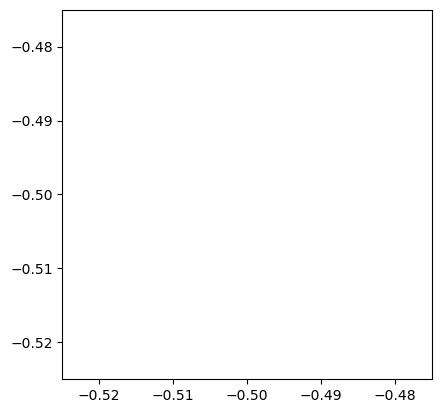

In [157]:
# 2059 Â∑ùÊπñÁßëÊäÄËÇ°‰ªΩÊúâÈôêÂÖ¨Âè∏
stock_symbol = '2059'
keywords = ['Â∑ùÊπñ', '‰º∫ÊúçÂô®', 'Â∞éËªå', 'ÊûóËÅ∞Âêâ', 'King Slide', 'Èõ≤Á´Ø', 'ÊªëËªå', 'Èâ∏Èèà', 'ÂΩ±Âç∞Ê©ü', 'ÈõÜÁ∑öÂô®', '‰∏çÊñ∑ÈõªÁ≥ªÁµ±']
stock_data_source = 'ÂæÆËÇ°ÂäõÂÄãËÇ°‰∫§ÊòìÊï∏Êìö-2Âπ¥'
content_data_source = ['ÂÖßÂÆπÊï∏ÊìöÊñ∞ËÅû1', 'ÂÖßÂÆπÊï∏ÊìöÊñ∞ËÅû2']
n_days_after = 5
target_year=2023
dataset = get_gain_rate_after_n_days(stock_data_source, content_data_source, stock_symbol, keywords, n_days_after)

accuracy_list = []
results_list = []
filtered_df_list = []
for target_month in range(5, 12):
	accuracy, results, filtered_df = phase_3(dataset, target_year, target_month)
	accuracy_list.append(accuracy)
	results_list.append(results)
	filtered_df_list.append(filtered_df)
accuracy_list

In [146]:
filtered_df

date  y_pred  y_test
0   2023-07-03       1       1
3   2023-07-07       1       1
6   2023-07-12       1       1
8   2023-07-14      -1       1
10  2023-07-18       1       1
11  2023-07-19       1       1
12  2023-07-21       1       1
13  2023-07-24       1       1
14  2023-07-25       1       1
17  2023-07-28       1       1

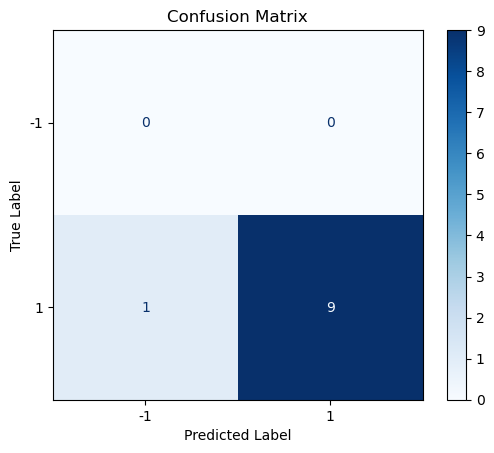

In [109]:
target_year = 2023
target_month = 4
content_train, content_test, y_train, y_test = split_train_test_with_month(dataset, target_year, target_month)

safe 0
safe 1
safe 2
content_train = 0      [ÈâÖ, ‰∫®, ÈÄüÂ†±, ,  , , -, ,  , , Factset, ,  , , ÊúÄÊñ∞...
1      [Ë≥áÈáë, ÈÅøÈö™, ,  , , Âè∞, ËÇ°, 3, Êúà, ÈúáÁõ™, Êï¥ÁêÜ, ,  , , ÁæéÂúã,...
2      [Âè∞, ËÇ°, ÂÖ®Âπ¥, IPO, ,  , , Êà∞, 10, Âπ¥, Êñ∞È´ò, ,  , , Ëµ∞Âá∫...
3      [„Äà, Áæé, ËÇ°, Áõ§, Âæå, „Äâ, ÁâπÊñØ, ÁâπÊñØÊãâ, ÊñØÊãâ, ÂãÅ, Êèö, ÈÄæ, 5, %,...
4      [È´òÂÉπ, È´òÂÉπËÇ°, Âê∏Èáë, ,  , , Á••, Á¢©, „ÄÅ, Á∑Ø, Á©é, Ê¨äË≠â, ÁÜ±, ,  ...
                             ...                        
135    [Âè∞, Á©ç, Èõª, ADR, Â§ß, Êº≤, ËºÉ, Âè∞, ËÇ°, Ê∫¢ÂÉπ, Â∑≤, ÈÄæ, 15, %,...
136    [„Äà, Áæé, ËÇ°, Áõ§, Âæå, „Äâ, ‰ºÅÊ•≠, Ë≤°, Â†±, „ÄÅ, Á∂ìÊøü, Êï∏Êìö, ÊÜÇ, Âñú, ...
137    [Âè∞, ËÇ°ÂÉπ, ÂÉπÂÄº, ÂûãÂü∫Èáë, Âü∫Èáë, ,  , , Âãù, Â§ßÁõ§, ,  , , Èáë, Ëôé...
138    [Âè∞, ËÇ°ÂÉπ, ÂÉπÂÄº, ÂûãÂü∫Èáë, Âü∫Èáë, ,  , , Âãù, Â§ßÁõ§, ,  , , Èáë, Ëôé...
139    [„Äà, Áæé, ËÇ°, Áõ§, Âæå, „Äâ, ‰ºÅÊ•≠, ÂâçÊôØ, Áñ≤Ëªü, Âºï, Ë°∞ÈÄÄ, ÊìîÊÜÇ, ,  ,...
Name: content, Length: 140, dtype: object
y_train = 0      0
1  

/var/folders/gf/q242kxcx471dfq8lmv99k_y80000gn/T/ipykernel_42737/1827654832.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exchange_data['delta'] = exchange_data['close'] - exchange_data['open']
/var/folders/gf/q242kxcx471dfq8lmv99k_y80000gn/T/ipykernel_42737/1827654832.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exchange_data['gain_rate'] = exchange_data['delta'] / exchange_data['open']
/var/folders/gf/q242kxcx471dfq8lmv99k_y80000gn/T/ipykernel_42737/1827654832.py:41: SettingWithCopyWarning:

ÂÖßÂÆπÊï∏ÊìöÊñ∞ËÅû1
ÂÖßÂÆπÊï∏ÊìöÊñ∞ËÅû2
ÂÖßÂÆπÊï∏ÊìöÊñ∞ËÅû3
object
(485492, 9)
(184883, 9)
['10' '11' '12' '14' '15' '20' '2022' '2023' '2024' 'ai' '‰∏äÊº≤' '‰∏ãÂçä'
 '‰∏ãÂçä ‰∏ãÂçäÂπ¥' '‰∏ãÂçä ‰∏ãÂçäÂπ¥ ÂçäÂπ¥' '‰∏ãÂçäÂπ¥' '‰∏ãÂçäÂπ¥ ÂçäÂπ¥' '‰∏ãË∑å' '‰∏≠Âúã' '‰∫§Êòì' '‰ºÅÊ•≠' '‰æõÊáâ' '‰æõÊáâ ‰æõÊáâÈèà'
 '‰æõÊáâÈèà' 'ÂÑÑÂÖÉ' 'ÂÑÑÁæéÂÖÉ' 'ÂÑÑÁæéÂÖÉ ÁæéÂÖÉ' 'ÂÖàÈÄ≤' 'ÂÖ®ÁêÉ' 'ÂÖ¨Âè∏' 'Âá∫Ë≤®' 'ÂàÜÊûê' 'Âà©Áéá' 'ÂåÖÊã¨' 'ÂçáÊÅØ' 'ÂçäÂ∞é'
 'ÂçäÂ∞é ÂçäÂ∞éÈ´î' 'ÂçäÂ∞é ÂçäÂ∞éÈ´î Â∞éÈ´î' 'ÂçäÂ∞éÈ´î' 'ÂçäÂ∞éÈ´î Â∞éÈ´î' 'ÂçäÂπ¥' 'ÂéªÂπ¥' 'ÂèØÊúõ' 'Âè∞Âåó' 'ÂúãÈöõ' 'Âü∫Èáë' 'Â¢ûÂä†'
 'Â§ñË≥á' 'ÂÆ¢Êà∂' 'Â∞éÈ´î' 'Â∏ÇÂ†¥' 'Â∏∂Âãï' 'Â∫´Â≠ò' 'ÂΩ±Èüø' 'ÊàêÈï∑' 'ÊâãÊ©ü' 'ÊäÄË°ì' 'ÊäïË≥á' 'ÊåÅÁ∫å' 'ÊåáÂá∫' 'ÊåáÊï∏'
 'Êñ∞È´ò' 'ÊóèÁæ§' 'ÊòéÂπ¥' 'ÊôÇÂ†±' 'ÊôÇÂ†± Âè∞Âåó' 'Êô∂Áâá' 'Êô∫ÊÖß' 'ÊúçÂãô' 'Êú™‰æÜ' 'Ê≥ï‰∫∫' 'Ê∂àË≤ª' 'Êº≤ÂπÖ' 'ÁáüÈÅã' 'Áç≤Âà©'
 'ÁîüÁî¢' 'Áî¢ÂìÅ' 'Áî¢Ê•≠' 'Áî¢ËÉΩ' 'ÁôºÂ±ï' 'Áõ∏Èóú' 'ÁßëÊäÄ' 'Á¨¨‰∏Ä' 'Á¨¨‰∏â' 'Á∂ìÊøü' 'ÁæéÂÖÉ' 'ÁæéÂúã' 'ËÇ°ÂÉπ' 'ËÇ°Â∏Ç'
 'ËòãÊûú' 'Ë°®Áèæ' 'Ë£ΩÁ®ã' 'Ë£

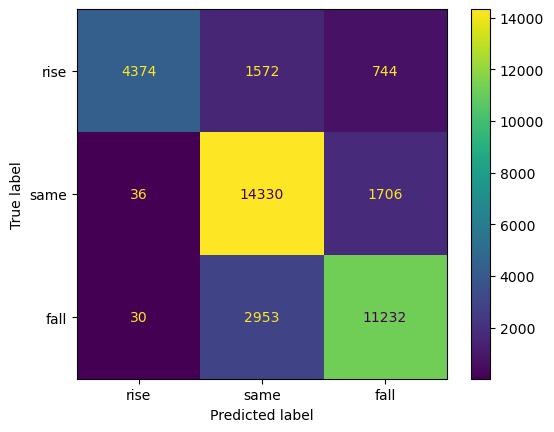

In [72]:
# 2330 Âè∞Á©çÈõª 0.00001
keywords = ['Âè∞Á©çÈõª', 'ÂçäÂ∞éÈ´î', 'AI', 'ËòãÊûú', 'Apple', 'Âè∞ÁÅ£Á©çÈ´îÈõªË∑Ø', 'Ëá∫ÁÅ£Á©çÈ´îÈõªË∑Ø', 'ÂºµÂø†Ë¨Ä', 'Êô∂Áâá', 'Êô∂Âúì', 'Ë≠∑ÂúãÁ•ûÂ±±']
stock_data_source = 'ÂæÆËÇ°ÂäõÂÄãËÇ°‰∫§ÊòìÊï∏Êìö-2Âπ¥'
content_data_source = ['ÂÖßÂÆπÊï∏ÊìöÊñ∞ËÅû1', 'ÂÖßÂÆπÊï∏ÊìöÊñ∞ËÅû2', 'ÂÖßÂÆπÊï∏ÊìöÊñ∞ËÅû3']
stock_symbol = '2330'
n_days_after = 5

phase_1_and_2(stock_data_source, content_data_source, stock_symbol, keywords, n_days_after)

/var/folders/gf/q242kxcx471dfq8lmv99k_y80000gn/T/ipykernel_42737/3807372300.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exchange_data['delta'] = exchange_data['close'] - exchange_data['open']
/var/folders/gf/q242kxcx471dfq8lmv99k_y80000gn/T/ipykernel_42737/3807372300.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exchange_data['gain_rate'] = exchange_data['delta'] / exchange_data['open']
/var/folders/gf/q242kxcx471dfq8lmv99k_y80000gn/T/ipykernel_42737/3807372300.py:41: SettingWithCopyWarning:

ÂÖßÂÆπÊï∏ÊìöÊñ∞ËÅû1
ÂÖßÂÆπÊï∏ÊìöÊñ∞ËÅû2
ÂÖßÂÆπÊï∏ÊìöÊñ∞ËÅû3
object
(485492, 9)
(184883, 9)
['10' '11' '12' '14' '15' '20' '2022' '2023' '2024' 'ai' '‰∏äÊº≤' '‰∏ãÂçä'
 '‰∏ãÂçä ‰∏ãÂçäÂπ¥' '‰∏ãÂçä ‰∏ãÂçäÂπ¥ ÂçäÂπ¥' '‰∏ãÂçäÂπ¥' '‰∏ãÂçäÂπ¥ ÂçäÂπ¥' '‰∏ãË∑å' '‰∏≠Âúã' '‰∫§Êòì' '‰ºÅÊ•≠' '‰æõÊáâ' '‰æõÊáâ ‰æõÊáâÈèà'
 '‰æõÊáâÈèà' 'ÂÑÑÂÖÉ' 'ÂÑÑÁæéÂÖÉ' 'ÂÑÑÁæéÂÖÉ ÁæéÂÖÉ' 'ÂÖàÈÄ≤' 'ÂÖ®ÁêÉ' 'ÂÖ¨Âè∏' 'Âá∫Ë≤®' 'ÂàÜÊûê' 'Âà©Áéá' 'ÂåÖÊã¨' 'ÂçáÊÅØ' 'ÂçäÂ∞é'
 'ÂçäÂ∞é ÂçäÂ∞éÈ´î' 'ÂçäÂ∞é ÂçäÂ∞éÈ´î Â∞éÈ´î' 'ÂçäÂ∞éÈ´î' 'ÂçäÂ∞éÈ´î Â∞éÈ´î' 'ÂçäÂπ¥' 'ÂéªÂπ¥' 'ÂèØÊúõ' 'Âè∞Âåó' 'ÂúãÈöõ' 'Âü∫Èáë' 'Â¢ûÂä†'
 'Â§ñË≥á' 'ÂÆ¢Êà∂' 'Â∞éÈ´î' 'Â∏ÇÂ†¥' 'Â∏∂Âãï' 'Â∫´Â≠ò' 'ÂΩ±Èüø' 'ÊàêÈï∑' 'ÊâãÊ©ü' 'ÊäÄË°ì' 'ÊäïË≥á' 'ÊåÅÁ∫å' 'ÊåáÂá∫' 'ÊåáÊï∏'
 'Êñ∞È´ò' 'ÊóèÁæ§' 'ÊòéÂπ¥' 'ÊôÇÂ†±' 'ÊôÇÂ†± Âè∞Âåó' 'Êô∂Áâá' 'Êô∫ÊÖß' 'ÊúçÂãô' 'Êú™‰æÜ' 'Ê≥ï‰∫∫' 'Ê∂àË≤ª' 'Êº≤ÂπÖ' 'ÁáüÈÅã' 'Áç≤Âà©'
 'ÁîüÁî¢' 'Áî¢ÂìÅ' 'Áî¢Ê•≠' 'Áî¢ËÉΩ' 'ÁôºÂ±ï' 'Áõ∏Èóú' 'ÁßëÊäÄ' 'Á¨¨‰∏Ä' 'Á¨¨‰∏â' 'Á∂ìÊøü' 'ÁæéÂÖÉ' 'ÁæéÂúã' 'ËÇ°ÂÉπ' 'ËÇ°Â∏Ç'
 'ËòãÊûú' 'Ë°®Áèæ' 'Ë£ΩÁ®ã' 'Ë£

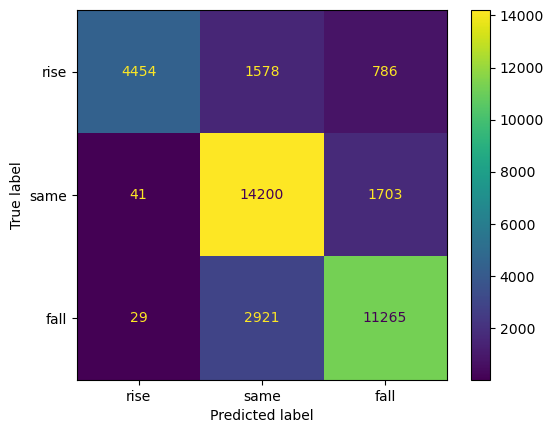

In [62]:
# 2330 Âè∞Á©çÈõª 0.001
keywords = ['Âè∞Á©çÈõª', 'ÂçäÂ∞éÈ´î', 'AI', 'ËòãÊûú', 'Apple', 'Âè∞ÁÅ£Á©çÈ´îÈõªË∑Ø', 'Ëá∫ÁÅ£Á©çÈ´îÈõªË∑Ø', 'ÂºµÂø†Ë¨Ä', 'Êô∂Áâá', 'Êô∂Âúì', 'Ë≠∑ÂúãÁ•ûÂ±±']
stock_data_source = 'ÂæÆËÇ°ÂäõÂÄãËÇ°‰∫§ÊòìÊï∏Êìö-2Âπ¥'
content_data_source = ['ÂÖßÂÆπÊï∏ÊìöÊñ∞ËÅû1', 'ÂÖßÂÆπÊï∏ÊìöÊñ∞ËÅû2', 'ÂÖßÂÆπÊï∏ÊìöÊñ∞ËÅû3']
stock_symbol = '2330'
n_days_after = 5

phase_1_and_2(stock_data_source, content_data_source, stock_symbol, keywords, n_days_after)

/var/folders/gf/q242kxcx471dfq8lmv99k_y80000gn/T/ipykernel_42737/566423286.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exchange_data['delta'] = exchange_data['close'] - exchange_data['open']
/var/folders/gf/q242kxcx471dfq8lmv99k_y80000gn/T/ipykernel_42737/566423286.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exchange_data['gain_rate'] = exchange_data['delta'] / exchange_data['open']
/var/folders/gf/q242kxcx471dfq8lmv99k_y80000gn/T/ipykernel_42737/566423286.py:41: SettingWithCopyWarning: 
A

ÂÖßÂÆπÊï∏ÊìöÊñ∞ËÅû1
ÂÖßÂÆπÊï∏ÊìöÊñ∞ËÅû2
ÂÖßÂÆπÊï∏ÊìöÊñ∞ËÅû3
object
(485492, 9)
(184883, 9)
['10' '11' '12' '14' '15' '20' '2022' '2023' '2024' 'ai' '‰∏äÊº≤' '‰∏ãÂçä'
 '‰∏ãÂçä ‰∏ãÂçäÂπ¥' '‰∏ãÂçä ‰∏ãÂçäÂπ¥ ÂçäÂπ¥' '‰∏ãÂçäÂπ¥' '‰∏ãÂçäÂπ¥ ÂçäÂπ¥' '‰∏ãË∑å' '‰∏≠Âúã' '‰∫§Êòì' '‰ºÅÊ•≠' '‰æõÊáâ' '‰æõÊáâ ‰æõÊáâÈèà'
 '‰æõÊáâÈèà' 'ÂÑÑÂÖÉ' 'ÂÑÑÁæéÂÖÉ' 'ÂÑÑÁæéÂÖÉ ÁæéÂÖÉ' 'ÂÖàÈÄ≤' 'ÂÖ®ÁêÉ' 'ÂÖ¨Âè∏' 'Âá∫Ë≤®' 'ÂàÜÊûê' 'Âà©Áéá' 'ÂåÖÊã¨' 'ÂçáÊÅØ' 'ÂçäÂ∞é'
 'ÂçäÂ∞é ÂçäÂ∞éÈ´î' 'ÂçäÂ∞é ÂçäÂ∞éÈ´î Â∞éÈ´î' 'ÂçäÂ∞éÈ´î' 'ÂçäÂ∞éÈ´î Â∞éÈ´î' 'ÂçäÂπ¥' 'ÂéªÂπ¥' 'ÂèØÊúõ' 'Âè∞Âåó' 'ÂúãÈöõ' 'Âü∫Èáë' 'Â¢ûÂä†'
 'Â§ñË≥á' 'ÂÆ¢Êà∂' 'Â∞éÈ´î' 'Â∏ÇÂ†¥' 'Â∏∂Âãï' 'Â∫´Â≠ò' 'ÂΩ±Èüø' 'ÊàêÈï∑' 'ÊâãÊ©ü' 'ÊäÄË°ì' 'ÊäïË≥á' 'ÊåÅÁ∫å' 'ÊåáÂá∫' 'ÊåáÊï∏'
 'Êñ∞È´ò' 'ÊóèÁæ§' 'ÊòéÂπ¥' 'ÊôÇÂ†±' 'ÊôÇÂ†± Âè∞Âåó' 'Êô∂Áâá' 'Êô∫ÊÖß' 'ÊúçÂãô' 'Êú™‰æÜ' 'Ê≥ï‰∫∫' 'Ê∂àË≤ª' 'Êº≤ÂπÖ' 'ÁáüÈÅã' 'Áç≤Âà©'
 'ÁîüÁî¢' 'Áî¢ÂìÅ' 'Áî¢Ê•≠' 'Áî¢ËÉΩ' 'ÁôºÂ±ï' 'Áõ∏Èóú' 'ÁßëÊäÄ' 'Á¨¨‰∏Ä' 'Á¨¨‰∏â' 'Á∂ìÊøü' 'ÁæéÂÖÉ' 'ÁæéÂúã' 'ËÇ°ÂÉπ' 'ËÇ°Â∏Ç'
 'ËòãÊûú' 'Ë°®Áèæ' 'Ë£ΩÁ®ã' 'Ë£

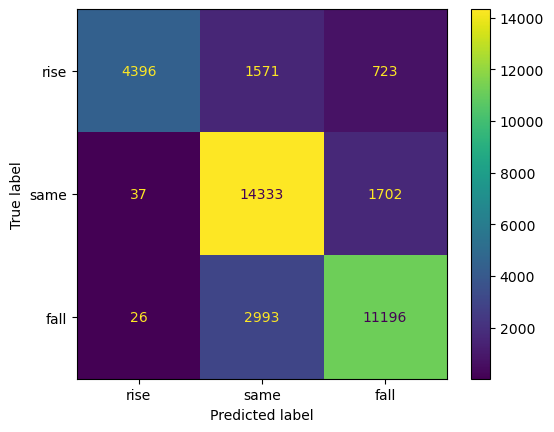

In [67]:
# 2330 Âè∞Á©çÈõª 0.0005
keywords = ['Âè∞Á©çÈõª', 'ÂçäÂ∞éÈ´î', 'AI', 'ËòãÊûú', 'Apple', 'Âè∞ÁÅ£Á©çÈ´îÈõªË∑Ø', 'Ëá∫ÁÅ£Á©çÈ´îÈõªË∑Ø', 'ÂºµÂø†Ë¨Ä', 'Êô∂Áâá', 'Êô∂Âúì', 'Ë≠∑ÂúãÁ•ûÂ±±']
stock_data_source = 'ÂæÆËÇ°ÂäõÂÄãËÇ°‰∫§ÊòìÊï∏Êìö-2Âπ¥'
content_data_source = ['ÂÖßÂÆπÊï∏ÊìöÊñ∞ËÅû1', 'ÂÖßÂÆπÊï∏ÊìöÊñ∞ËÅû2', 'ÂÖßÂÆπÊï∏ÊìöÊñ∞ËÅû3']
stock_symbol = '2330'
n_days_after = 5

phase_1_and_2(stock_data_source, content_data_source, stock_symbol, keywords, n_days_after)

/var/folders/gf/q242kxcx471dfq8lmv99k_y80000gn/T/ipykernel_42737/1163521706.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exchange_data['delta'] = exchange_data['close'] - exchange_data['open']
/var/folders/gf/q242kxcx471dfq8lmv99k_y80000gn/T/ipykernel_42737/1163521706.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exchange_data['gain_rate'] = exchange_data['delta'] / exchange_data['open']
/var/folders/gf/q242kxcx471dfq8lmv99k_y80000gn/T/ipykernel_42737/1163521706.py:38: SettingWithCopyWarning:

ÂÖßÂÆπÊï∏ÊìöÊñ∞ËÅû1
ÂÖßÂÆπÊï∏ÊìöÊñ∞ËÅû2
ÂÖßÂÆπÊï∏ÊìöÊñ∞ËÅû3
Ë®éË´ñÊï∏Êìömobile01-1
Ë®éË´ñÊï∏Êìömobile01-2
Ë®éË´ñÊï∏Êìöptt
(742961, 10)
(31856, 10)
['10' '11' '12' '2022' '2023' '2024' 'ai' 'ai ‰º∫Êúç' 'ai ‰º∫Êúç ‰º∫ÊúçÂô®' '‰∏âÂ≠£' '‰∏äÊº≤'
 '‰∏ãÂçä' '‰∏ãÂçä ‰∏ãÂçäÂπ¥' '‰∏ãÂçä ‰∏ãÂçäÂπ¥ ÂçäÂπ¥' '‰∏ãÂçäÂπ¥' '‰∏ãÂçäÂπ¥ ÂçäÂπ¥' '‰∏≠Âúã' '‰∏≠ÂøÉ' '‰ºÅÊ•≠' '‰º∫Êúç' '‰º∫Êúç ‰º∫ÊúçÂô®'
 '‰º∫ÊúçÂô®' '‰æõÊáâ' '‰æõÊáâ ‰æõÊáâÈèà' '‰æõÊáâÈèà' 'ÂÑÑÂÖÉ' 'ÂÑÑÁæéÂÖÉ' 'ÂÑÑÁæéÂÖÉ ÁæéÂÖÉ' 'ÂÖ®ÁêÉ' 'ÂÖ¨Âè∏' 'Âá∫Ë≤®' 'Âà©Áéá' 'ÂãïËÉΩ'
 'ÂåÖÊã¨' 'ÂçäÂ∞é' 'ÂçäÂ∞é ÂçäÂ∞éÈ´î' 'ÂçäÂ∞é ÂçäÂ∞éÈ´î Â∞éÈ´î' 'ÂçäÂ∞éÈ´î' 'ÂçäÂ∞éÈ´î Â∞éÈ´î' 'ÂçäÂπ¥' 'ÂéªÂπ¥' 'ÂèóÊÉ†' 'ÂèØÊúõ' 'Âè∞Âåó'
 'Âêà‰Ωµ' 'ÂêåÊúü' 'Â¢ûÂä†' 'Â§ñË≥á' 'ÂÆ¢Êà∂' 'Â∞éÈ´î' 'Â±ïÊúõ' 'Â∏ÇÂ†¥' 'Â∏∂Âãï' 'Âπ≥Âè∞' 'Â∫´Â≠ò' 'ÂΩ±Èüø' 'ÊàêÈï∑' 'ÊäÄË°ì'
 'ÊäïË≥á' 'ÊåÅÁ∫å' 'ÊåáÂá∫' 'ÊåáÊï∏' 'ÊèêÂçá' 'Êï¥È´î' 'Êñ∞È´ò' 'ÊòéÂπ¥' 'ÊôÇÂ†±' 'Êô∂Áâá' 'Êô∫ÊÖß' 'ÊúçÂãô' 'Êú™‰æÜ' 'Ê•≠Âãô'
 'ÊØèËÇ°' 'Ê≥ï‰∫∫' 'Ê∂àË≤ª' 'ÁáüÈÅã' 'Áç≤Âà©' 'Áî¢ÂìÅ' 'Áî¢Ê•≠' 'ÁôºÂ±ï' 'Áõ∏Èóú' 'Áúã

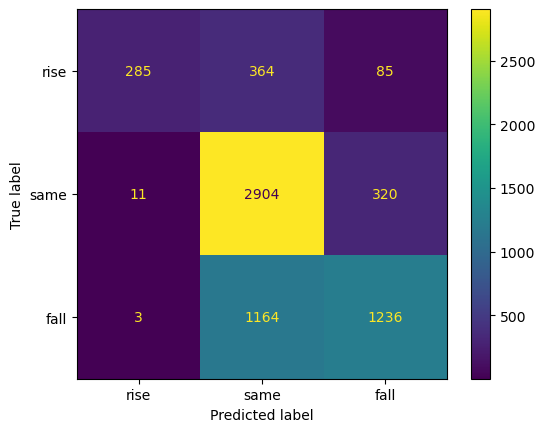

In [ ]:
# 2059 Â∑ùÊπñÁßëÊäÄËÇ°‰ªΩÊúâÈôêÂÖ¨Âè∏
stock_symbol = '2059'
keywords = ['Â∑ùÊπñ', '‰º∫ÊúçÂô®', 'Â∞éËªå', 'ÊûóËÅ∞Âêâ', 'King Slide', 'Èõ≤Á´Ø', 'ÊªëËªå', 'Èâ∏Èèà', 'ÂΩ±Âç∞Ê©ü', 'ÈõÜÁ∑öÂô®', '‰∏çÊñ∑ÈõªÁ≥ªÁµ±']
stock_data_source = 'ÂæÆËÇ°ÂäõÂÄãËÇ°‰∫§ÊòìÊï∏Êìö-2Âπ¥'
content_data_source = ['ÂÖßÂÆπÊï∏ÊìöÊñ∞ËÅû1', 'ÂÖßÂÆπÊï∏ÊìöÊñ∞ËÅû2', 'ÂÖßÂÆπÊï∏ÊìöÊñ∞ËÅû3']
n_days_after = 5


phase_1_and_2(stock_data_source, content_data_source, stock_symbol, keywords, n_days_after)

/var/folders/gf/q242kxcx471dfq8lmv99k_y80000gn/T/ipykernel_42737/3807372300.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exchange_data['delta'] = exchange_data['close'] - exchange_data['open']
/var/folders/gf/q242kxcx471dfq8lmv99k_y80000gn/T/ipykernel_42737/3807372300.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exchange_data['gain_rate'] = exchange_data['delta'] / exchange_data['open']
/var/folders/gf/q242kxcx471dfq8lmv99k_y80000gn/T/ipykernel_42737/3807372300.py:41: SettingWithCopyWarning:

ÂÖßÂÆπÊï∏ÊìöÊñ∞ËÅû1
ÂÖßÂÆπÊï∏ÊìöÊñ∞ËÅû2
ÂÖßÂÆπÊï∏ÊìöÊñ∞ËÅû3
object
(485492, 9)
(94080, 9)
['10' '11' '12' '15' '20' '2022' '2023' 'ai' 'ai ‰º∫Êúç' 'ai ‰º∫Êúç ‰º∫ÊúçÂô®' '‰∏âÂ≠£' '‰∏äÊº≤'
 '‰∏ãÂçä' '‰∏ãÂçä ‰∏ãÂçäÂπ¥' '‰∏ãÂçä ‰∏ãÂçäÂπ¥ ÂçäÂπ¥' '‰∏ãÂçäÂπ¥' '‰∏ãÂçäÂπ¥ ÂçäÂπ¥' '‰∏ãË∑å' '‰∏≠Âúã' '‰∫§Êòì' '‰ºÅÊ•≠' '‰º∫Êúç'
 '‰º∫Êúç ‰º∫ÊúçÂô®' '‰º∫ÊúçÂô®' '‰æõÊáâ' '‰æõÊáâ ‰æõÊáâÈèà' '‰æõÊáâÈèà' 'ÂÄãËÇ°' 'ÂÑÑÂÖÉ' 'ÂÖ®ÁêÉ' 'ÂÖ¨Âè∏' 'Âá∫Ë≤®' 'Âà©Áéá' 'ÂãïËÉΩ'
 'ÂçäÂ∞é' 'ÂçäÂ∞é ÂçäÂ∞éÈ´î' 'ÂçäÂ∞é ÂçäÂ∞éÈ´î Â∞éÈ´î' 'ÂçäÂ∞éÈ´î' 'ÂçäÂ∞éÈ´î Â∞éÈ´î' 'ÂçäÂπ¥' 'ÂéªÂπ¥' 'ÂèóÊÉ†' 'ÂèØÊúõ' 'Âè∞Âåó' 'Âêà‰Ωµ'
 'ÂêåÊúü' 'Â¢ûÂä†' 'Â§ñË≥á' 'Â§ßÊ≥ï' 'Â§ßÊ≥ï Ê≥ï‰∫∫' 'ÂÆ¢Êà∂' 'Â∞éÈ´î' 'Â∏ÇÂ†¥' 'Â∏∂Âãï' 'Â∫´Â≠ò' 'ÂΩ±Èüø' 'Êàê‰∫§' 'ÊàêÈï∑' 'ÊäÄË°ì'
 'ÊäïË≥á' 'ÊåÅÁ∫å' 'ÊåáÂá∫' 'ÊåáÊï∏' 'Êï¥È´î' 'Êñ∞È´ò' 'ÊóèÁæ§' 'ÊòéÂπ¥' 'ÊôÇÂ†±' 'ÊôÇÂ†± Âè∞Âåó' 'Êô∂Áâá' 'Êô∫ÊÖß' 'ÊúçÂãô' 'Êú™‰æÜ'
 'Ê≥ï‰∫∫' 'Ê∂àË≤ª' 'ÁáüÈÅã' 'Áç≤Âà©' 'Áî¢ÂìÅ' 'Áî¢Ê•≠' 'ÁôºÂ±ï' 'Áõ∏Èóú' 'ÁßëÊäÄ' 'Á¨¨‰∏Ä' 'Á¨¨‰∏â' 'Á¥ØË®à' 'Á∂ìÊøü' 'ÁæéÂÖÉ'
 'ÁæéÂúã' 'Ë

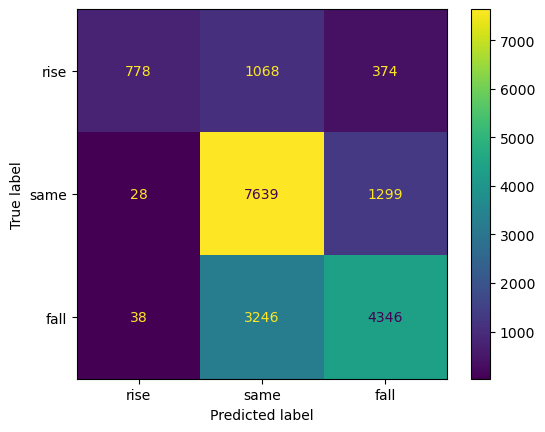

In [64]:
# 2383 Âè∞ÂÖâÈõªÂ≠êÊùêÊñôËÇ°‰ªΩÊúâÈôêÂÖ¨Âè∏ (Not in Â•áÊë©ËÇ°Â∏ÇÂÆöÁæ©‰πãAIÊ¶ÇÂøµËÇ°
stock_symbol = '2383'
keywords = ['Âè∞ÂÖâÈõª', '‰º∫ÊúçÂô®', 'ÈäÖÁÆîÂü∫Êùø', 'ÈõªË∑ØÊùø', 'UBB', 'CCL', 'ÈõªÂ≠ê', 'AI‰º∫ÊúçÂô®', 'PCB', 'Ëë£ÂÆöÂÆá']
stock_data_source = 'ÂæÆËÇ°ÂäõÂÄãËÇ°‰∫§ÊòìÊï∏Êìö-2Âπ¥'
content_data_source = ['ÂÖßÂÆπÊï∏ÊìöÊñ∞ËÅû1', 'ÂÖßÂÆπÊï∏ÊìöÊñ∞ËÅû2', 'ÂÖßÂÆπÊï∏ÊìöÊñ∞ËÅû3']
n_days_after = 5


phase_1_and_2(stock_data_source, content_data_source, stock_symbol, keywords, n_days_after)

/var/folders/gf/q242kxcx471dfq8lmv99k_y80000gn/T/ipykernel_42737/3807372300.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exchange_data['delta'] = exchange_data['close'] - exchange_data['open']
/var/folders/gf/q242kxcx471dfq8lmv99k_y80000gn/T/ipykernel_42737/3807372300.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exchange_data['gain_rate'] = exchange_data['delta'] / exchange_data['open']
/var/folders/gf/q242kxcx471dfq8lmv99k_y80000gn/T/ipykernel_42737/3807372300.py:41: SettingWithCopyWarning:

ÂÖßÂÆπÊï∏ÊìöÊñ∞ËÅû1
ÂÖßÂÆπÊï∏ÊìöÊñ∞ËÅû2
ÂÖßÂÆπÊï∏ÊìöÊñ∞ËÅû3
object
(485492, 9)
(151492, 9)
['10' '11' '12' '15' '20' '2022' '2023' 'ai' 'ic' '‰∏âÂ≠£' '‰∏äÊº≤' '‰∏ãÂçä' '‰∏ãÂçä ‰∏ãÂçäÂπ¥'
 '‰∏ãÂçä ‰∏ãÂçäÂπ¥ ÂçäÂπ¥' '‰∏ãÂçäÂπ¥' '‰∏ãÂçäÂπ¥ ÂçäÂπ¥' '‰∏ãË∑å' '‰∏≠Âúã' '‰∫§Êòì' '‰ºÅÊ•≠' '‰æõÊáâ' '‰æõÊáâ ‰æõÊáâÈèà' '‰æõÊáâÈèà' 'ÂÑÑÂÖÉ'
 'ÂÑÑÁæéÂÖÉ' 'ÂÑÑÁæéÂÖÉ ÁæéÂÖÉ' 'ÂÖ®ÁêÉ' 'ÂÖ¨Âè∏' 'Âá∫Ë≤®' 'ÂàÜÊûê' 'Âà©Áéá' 'ÂåÖÊã¨' 'ÂçäÂ∞é' 'ÂçäÂ∞é ÂçäÂ∞éÈ´î' 'ÂçäÂ∞é ÂçäÂ∞éÈ´î Â∞éÈ´î'
 'ÂçäÂ∞éÈ´î' 'ÂçäÂ∞éÈ´î Â∞éÈ´î' 'ÂçäÂπ¥' 'ÂéªÂπ¥' 'ÂèØÊúõ' 'Âè∞Âåó' 'Âêà‰Ωú' 'ÂêåÊúü' 'ÂúãÈöõ' 'Âü∫Èáë' 'Â¢ûÂä†' 'Â§ñË≥á' 'Â§ßÈô∏'
 'ÂÆ¢Êà∂' 'Â∞éÈ´î' 'Â∏ÇÂ†¥' 'Â∏∂Âãï' 'Â∫´Â≠ò' 'ÂΩ±Èüø' 'ÊàêÈï∑' 'ÊâãÊ©ü' 'ÊäÄË°ì' 'ÊäïË≥á' 'ÊåÅÁ∫å' 'ÊåáÂá∫' 'ÊåáÊï∏' 'Êèê‰æõ'
 'Êï∏‰Ωç' 'Êñ∞È´ò' 'ÊòéÂπ¥' 'ÊôÇÂ†±' 'ÊôÇÂ†± Âè∞Âåó' 'Êô∂Áâá' 'Êô∫ÊÖß' 'ÊúçÂãô' 'Êú™‰æÜ' 'Ê≥ï‰∫∫' 'Ê∂àË≤ª' 'ÁáüÈÅã' 'Áç≤Âà©' 'ÁîüÁî¢'
 'Áî¢ÂìÅ' 'Áî¢Ê•≠' 'Áî¢ËÉΩ' 'ÁôºÂ±ï' 'Áõ∏Èóú' 'ÁßëÊäÄ' 'Á¨¨‰∏Ä' 'Á¨¨‰∏â' 'Á∂ìÊøü' 'ÁæéÂÖÉ' 'ÁæéÂúã' 'ËÇ°ÂÉπ' 'Ëë£‰∫ã' 'Ë°®Áèæ'
 'Ë£ΩÁ®ã' '

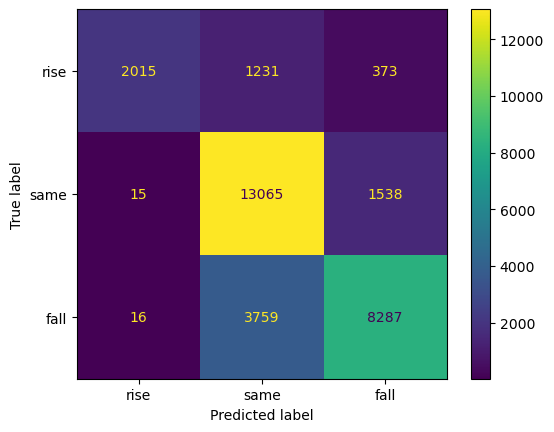

In [65]:
# 2454 ËÅØÁôºÁßëÊäÄ
stock_symbol = '2454'
keywords = ['ËÅØÁôºÁßë', 'ÁôºÂì•', 'ÂçäÂ∞éÈ´î', 'Ë∑ØÁî±Âô®', 'Êï∏‰Ωç', 'Êô∂Áâá', 'Ëî°ÂäõË°å', 'ÊâãÊ©ü', 'Êô∫ÊÖßÁµÇÁ´Ø', 'IC', 'Â§©Áí£']
stock_data_source = 'ÂæÆËÇ°ÂäõÂÄãËÇ°‰∫§ÊòìÊï∏Êìö-2Âπ¥'
content_data_source = ['ÂÖßÂÆπÊï∏ÊìöÊñ∞ËÅû1', 'ÂÖßÂÆπÊï∏ÊìöÊñ∞ËÅû2', 'ÂÖßÂÆπÊï∏ÊìöÊñ∞ËÅû3']
n_days_after = 5


phase_1_and_2(stock_data_source, content_data_source, stock_symbol, keywords, n_days_after)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1, max_depth=7, random_state=0)
clf.fit(content_train_tfidf, y_train)
clf.score(content_train_tfidf, y_train)

0.9435808262800637

In [ ]:
# backtesting
